# Fake News Detection

Fake news is one of the biggest problems because it leads to a lot of misinformation in a particular region. Most of the time, spreading false news about a community’s political and religious beliefs can lead to riots and violence as you must have seen in the country where you live. So, to detect fake news, we can find relationships between the fake news headlines so that we can train a machine learning model that can tell us whether a particular piece of information is fake or real by simply observing the headline in the news. So in the section below, I’m going to introduce you to a machine learning project on fake news detection using the Python programming language.


Dataset :- https://www.kaggle.com/c/fake-news/data

In [ ]:
#importing libraries
import numpy as np #2 perform mathematical operations on arrays
import pandas as pd #for data analysis
import seaborn as sns #statistical graphics

from sklearn.feature_extraction.text import CountVectorizer #breaking down a sentence/paragraph/any text in2 words
from sklearn.model_selection import train_test_split #measure the accuracy of the model
from sklearn.naive_bayes import MultinomialNB #counts words in text
from sklearn.metrics import accuracy_score #measure model performance
from sklearn.model_selection import cross_val_score #statistical method used to estimate the performance (or accuracy) of machine learning models

This dataset is very large and luckily it still has no missing values so without wasting any time let’s use the title column as the feature we need to train a machine learning model and the label column as the values we want to predict:

In [ ]:
#load the dataset 2 pandas data frame for manupulating the data
raw_news_data = pd.read_csv('news.csv', encoding = 'latin-1')

#now v hv 2 replace null values with null string otherwise it will show errors
#v will store this in variable claaed "mail_data"
news_data = raw_news_data.where((pd.notnull(raw_news_data)), '')

#lets check the shape of the dataset
news_data.shape

(6335, 4)

In [ ]:
#lets c sample of this dataset in pandas data frame
#first 10 rows of the dataset
news_data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nIâm not an immigrant, but my grandparent...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,âBritainâs Schindlerâ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
#last 10 rows of the dataset
news_data.tail(10)

,Unnamed: 0,title,text,label
6325,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,FAKE
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6328,9337,Radio Derb Is On The AirâLeonardo And Brazil...,,FAKE
6329,8737,Assange claims âcrazedâ Clinton campaign t...,Julian Assange has claimed the Hillary Clinton...,FAKE
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [ ]:
#data preprocessing 2 check whether if there r any empty values
#checking the number of missing values in each column
news_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

### Counterplot
Showing the total count of Real & Fake news in counterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


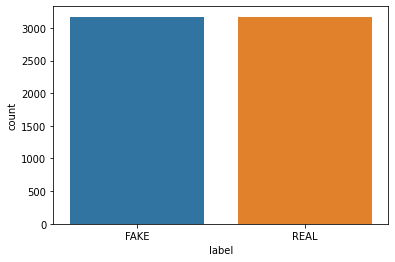

In [ ]:
#lets plot the data 
sns.countplot(news_data['label'])

#### Checking Number of Real & Fake News

In [ ]:
#here 'label' is the dependent variable & remaining (text, title & unnamed 0) r independent variable
#lets check how many values r there in dependent variable 'label'
#v can c how many examples r there for label real & fake
pd.value_counts(news_data['label'])

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
#compare the values for both news
news_data.groupby('label').mean()

#there is a difference in mean b/w fake & real news 
#this difference is very imp for us & this is how our ML Algo can find the difference b/w / it can predict b/w fake & real news 

,Unnamed: 0
label,
FAKE,7912.297092
REAL,2654.344056


Splitting the data into Features & Targets

This dataset is very large and luckily it still has no missing values so without wasting any time let’s use the title column as the feature we need to train a machine learning model and the label column as the values we want to predict:

In [ ]:
#now v need 2 separate te data as text & labels
x = np.array(news_data["title"]) #x --> Text data
y = np.array(news_data["label"]) #y --> Label data

print(x) #print text data
print('---------------------------------------------------------------------------------------------------------------------------')
print(y) #print label data

['You Can Smell Hillaryâ\x80\x99s Fear'
 'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)'
 'Kerry to go to Paris in gesture of sympathy' ...
 'Anti-Trump Protesters Are Tools of the Oligarchy     : Information'
 'In Ethiopia, Obama seeks progress on peace, security in East Africa'
 "Jeb Bush Is Suddenly Attacking Trump. Here's Why That Matters"]
---------------------------------------------------------------------------------------------------------------------------
['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']


In [ ]:
#loading the CountVectorizer in2 the variable "cv"
#training the CountVectorizer wyt the text(title) data
cv = CountVectorizer().fit_transform(x)

## Dividing data into train and test data using sklearn's train_test_split()

Now let’s separate the dataset into training and testing sets, and then I’ll use the Multinomial Naive Bayes algorithm to train the fake news detection model:

In [ ]:
#now v need 2 split the dataset in2 training data & testing data
#train_size represents how how much % data u want for training samples
#test_size represents how much % data u want for testing 
#random_state splits the data in the specific way, u can put any variable u want
#if u want 2 split the data in the same way u did before v need 2 specify the same random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#lets c how many examples r there for each cases
#checking dimensions of text
print(x.shape, x_train.shape, x_test.shape)

(6335, 10685) (5068, 10685) (1267, 10685)


In [ ]:
#lets c how many examples r there for each cases
#checking dimensions of labels
print(y.shape, y_train.shape, y_test.shape)

(6335,) (5068,) (1267,)


## Our data is ready to be applied a machine learning algorithm

In [ ]:
#training the model with training data
#data will b itterated around the hyperplane until gud plot is made

#loading the MultinomialNB in2 the variable "model"
model = MultinomialNB()

#training the MultinimialNB wyt the training data
model.fit(x_train, y_train)

MultinomialNB()

## Predicting seen data with our ML model

In [ ]:
#prediction on train_data
X_train_prediction = model.predict(x_train)
X_train_prediction

array(['REAL', 'FAKE', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype='<U4')

## Predicting unseen data with our ML model

In [ ]:
#prediction on test_data
X_test_prediction = model.predict(x_test)
X_test_prediction

array(['FAKE', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'REAL'], dtype='<U4')

In [ ]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data 
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
#print the accuracy_score on training data
print('Accuracy on Training data : ', training_data_accuracy)

#print the accuracy_score on testing data
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9459352801894239
Accuracy score on Test Data :  0.7971586424625099


## ML model Score

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
model.score(x_train, y_train)

0.9459352801894239

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
model.score(x_test, y_test)

0.7971586424625099

Lets Cross Validate and Check how the model performs.

In [ ]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(model, x, y, cv = 5))

[0.82478295 0.8074191  0.82636148 0.80899763 0.80426204]


Now let’s test this model. To test our trained model, I’ll first write down the title of any news item found on google news to see if our model predicts that the news is real or not:

Now I’m going to write a random fake news headline to see if the model predicts the news is fake or not:

In [ ]:
sample = input('Enter a message: ')
news_data = cv.transform([sample]).toarray()
print(model.predict(news_data))

Enter a message: COVID is cured using Cow dung
['FAKE']


## Summary
So this is how we can train a machine learning model for the task of fake news detection by using the Python programming language. Fake news is one of the biggest problems because it leads to a lot of misinformation in a particular region. I hope you liked this project on the task of Fake News detection with machine learning using Python. 

Saving the trained model

In [ ]:
import pickle #keeps track of the objects it has already serialized ==> allows saving model in very little tym

In [ ]:
#save the model trained in the file "trained_model.sav" to a new file called "fakenews_trained_model.pkl"
filename = 'fakenews_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('fakenews_trained_model.sav', 'rb'))

In [ ]:
sample = input('Enter a message: ')
news_data = cv.transform([sample]).toarray()
print(loaded_model.predict(news_data))

Enter a message: COVID is cured using Cow dung
['FAKE']
